In [14]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from os import listdir
from os.path import isfile, join

In [15]:
def generate_mouse_dataframe(mouse_data_path, mouse, trace_analysis_start, trace_analysis_end, delay, set_length, days_list):
    df_temp = pd.DataFrame(columns=['mouse', 'day', 'trial_number', 'trial_type', 'lick_data', 'lick_times', 'go_nogo', 'outcome', 'correct', 'hit', 'miss', 'set'])

    for day in days_list:
        day_files = [f for f in sorted(listdir(mouse_data_path)) if isfile(join(mouse_data_path, f)) and mouse in f and f"day{day}" in f]

        for file_name in day_files:
            file_path = join(mouse_data_path, file_name)
            data = pd.read_csv(file_path, header=None, names=['time', 'odour_a', 'odour_b', 'odour_c', 'licks', 'water'])

        # make a generic odour trace 
        data['odour'] = data.odour_a + data.odour_b + data.odour_c

        #find each odour
        key = []
        trial_number = []
        licks = []
        licks_times = []
        go_nogo = []
        outcome = []
        trial_count = 0
        odour_1 = []
        odour_2 = []

        odour_2_licks = []
        resp_wind_licks = []
        odour_2_resp_wind_licks = []

        #specfify time window to take lick datas from for each trial
        post_O2 = 7000


        for x in np.where(data.odour.diff() >2)[0][0:]: #(to detect first trial)

            #identify of the odour

            #if odour a
            if data.odour_a[x] > 2:
                #if preceded by odour b
                if x > (delay+1000) and data.odour_b[x-(delay+500)] > 2:
                    key.append('b->a')
                    trial_number.append(trial_count)
                    trial_count = trial_count + 1
                    licks.append(data.licks[x-(delay+4000):x+post_O2].values)
                    licks_times.append(np.where((data.licks[x-(delay+4000):x+post_O2].values) >2)[0])
                    go_nogo.append('no_go')
                    odour_2.append('a')
                    odour_1.append('b')


                    if len(np.where((data.licks[x+1500:x+2450].values) >2)[0]) == 0:
                        outcome.append('correct_rejection')
                    else:
                        outcome.append('false_positive')


                        #if preceded by odour c
                if x > (delay+1000) and data.odour_c[x-(delay+500)] >2:
                    key.append('c->a')
                    trial_number.append(trial_count)
                    trial_count = trial_count + 1
                    licks.append(data.licks[x-(delay+4000):x+post_O2].values)
                    licks_times.append(np.where((data.licks[x-(delay+4000):x+post_O2].values) >2)[0])
                    go_nogo.append('go')
                    odour_2.append('a')
                    odour_1.append('c')

                    if len(np.where((data.licks[x+1500:x+2450].values) >2)[0]) == 0:
                        outcome.append('miss')
                    else:
                        outcome.append('hit')

                        #if odour b
            if data.odour_b[x] >2:
                #if preceded by odour a
                if x > (delay+1000) and data.odour_a[x-(delay+500)] >2:
                    key.append('a->b')
                    trial_number.append(trial_count)
                    trial_count = trial_count + 1
                    licks.append(data.licks[x-(delay+4000):x+post_O2].values)
                    licks_times.append(np.where((data.licks[x-(delay+4000):x+post_O2].values) >2)[0])
                    go_nogo.append('go')
                    odour_1.append('a')
                    odour_2.append('b')

                    if len(np.where((data.licks[x+1500:x+2450].values) >2)[0]) == 0:
                        outcome.append('miss')
                    else:
                        outcome.append('hit')

                #if preceded by odour c
                if x > (delay+1000) and data.odour_c[x-(delay+500)] >2:
                    key.append('c->b')
                    trial_number.append(trial_count)
                    trial_count = trial_count + 1
                    licks.append(data.licks[x-(delay+4000):x+post_O2].values)
                    licks_times.append(np.where((data.licks[x-(delay+4000):x+post_O2].values) >2)[0])
                    go_nogo.append('no_go')
                    odour_1.append('c')
                    odour_2.append('b')

                    if len(np.where((data.licks[x+1500:x+2450].values) >2)[0]) == 0:
                        outcome.append('correct_rejection')
                    else:
                        outcome.append('false_positive')

            #if odour c
            if data.odour_c[x] >2:
                #if preceded by odour b
                if x > (delay+1000) and data.odour_b[x-(delay+500)] >2:
                    key.append('b->c')
                    trial_number.append(trial_count)
                    trial_count = trial_count + 1
                    licks.append(data.licks[x-(delay+4000):x+post_O2].values)
                    licks_times.append(np.where((data.licks[x-(delay+4000):x+post_O2].values) >2)[0])
                    go_nogo.append('go')
                    odour_1.append('b')
                    odour_2.append('c')

                    if len(np.where((data.licks[x+1500:x+2450].values) >2)[0]) == 0:
                        outcome.append('miss')
                    else:
                        outcome.append('hit')

                #if preceded by odour a
                if x > (delay+1000) and data.odour_a[x-(delay+500)] >2:
                    key.append('a->c')
                    trial_number.append(trial_count)
                    trial_count = trial_count + 1
                    licks.append(data.licks[x-(delay+4000):x+post_O2].values)
                    licks_times.append(np.where((data.licks[x-(delay+4000):x+post_O2].values) >2)[0])
                    go_nogo.append('no_go')
                    odour_1.append('a')
                    odour_2.append('b')

                    if len(np.where((data.licks[x+1500:x+2450].values) >2)[0]) == 0:
                        outcome.append('correct_rejection')
                    else:
                        outcome.append('false_positive')


        data_temp = pd.DataFrame()
        data_temp['mouse'] = np.repeat(mouse, len(key))
        data_temp['day'] = np.repeat(day, len(key))
        data_temp['trial_number'] = trial_number
        data_temp['trial_type'] = key
        data_temp['lick_data'] = licks
        data_temp['lick_times'] = licks_times
        data_temp['go_nogo'] = go_nogo
        data_temp['outcome'] = outcome
        data_temp['correct'] = np.where(data_temp.outcome == 'hit', 1.0, 0.0) + np.where(data_temp.outcome == 'correct_rejection', 1.0, 0.0)
        data_temp['hit'] = np.where(data_temp.outcome == 'hit', 1.0, 0.0)
        data_temp['correct_rejection'] = np.where(data_temp.outcome == 'correct_rejection', 1.0, 0.0)
        data_temp['miss'] = np.where(data_temp.outcome == 'miss', 1.0, 0.0)
        data_temp['false_positive'] = np.where(data_temp.outcome == 'false_positive', 1.0, 0.0)
        data_temp['odour_1'] = odour_1
        data_temp['odour_2'] = odour_2

        #data_temp.drop([0, 1, 2, 3, 4], inplace=True)
        # if first trial not recognised, remove other trials from first block
        data_temp.index = pd.RangeIndex(len(data_temp.index))
        # reset index

        block_length = 6

        odour_block = np.repeat(np.arange(len(data_temp)//block_length), block_length)

        # if there is not a number of trials divisible by 6
        if len(odour_block) != len(data_temp):
            # make a list of the last set number, the length required
            temp_block = np.ones(len(data_temp) - len(odour_block)) * -1
            odour_block = odour_block.tolist() + temp_block.tolist()

            data_temp['block'] = odour_block

            index_extra_trial = data_temp[ data_temp['block'] == -1 ].index
            data_temp.drop(index_extra_trial , inplace=True)
            #removes final trials in unfinished block
        elif len(odour_block) == len(data_temp):
            data_temp['block'] = odour_block

        odour_set = np.repeat(np.arange(len(data_temp)//set_length), set_length)

        # if there is not a number of trials divisible by 6
        if len(odour_set) != len(data_temp):
            # make a list of the last set number, the length required
            temp = np.ones(len(data_temp) - len(odour_set)) * odour_set[-1]
            odour_set = odour_set.tolist() + temp.tolist()
        data_temp['set'] = odour_set

        df_temp = pd.concat([df_temp, data_temp])

    return df_temp


# Dataframe generating zone

In [16]:
behaviour_directory = '/Users/chenx/Desktop/MacAskill Lab/Data/My_Rig_Data/Behaviour'
mouse_ids = ['maxwell_452', 'maxwell_453', 'maxwell_454']

# Define a dictionary mapping each mouse ID to its days of interest
days_of_interest = {
    'maxwell_452': [19,20,21,22,23,24,25,26],
    'maxwell_453': [13,14,16,17,18,19,20,21,22,23,24,25,26],
    'maxwell_454': [13,14,17,18,19,20,21,22,23,24,25,26]
}

data_frames = {} 

# Loop through each mouse ID, fetch its days of interest, and process the data
for mouse_id, days_to_process in days_of_interest.items():
    df_mouse = generate_mouse_dataframe(behaviour_directory, mouse_id, 1500, 2450, 5000, 10, days_to_process)
    data_frames[mouse_id] = df_mouse  # Store the DataFrame in the dictionary keyed by mouse ID

# Now you can access each mouse's DataFrame from the dictionary
df_maxwell_452 = data_frames['maxwell_452']
df_maxwell_453 = data_frames['maxwell_453']
df_maxwell_454 = data_frames['maxwell_454']

df_all_mice = pd.concat([df_maxwell_452, df_maxwell_453, df_maxwell_454])

In [17]:
import pandas as pd

# Assuming df_all_mice is your DataFrame containing the data for all mice

# Step 1: Prepare the df_all_mice DataFrame
df_all_mice['day'] = pd.to_numeric(df_all_mice['day'])  # Convert 'day' to numeric
df_all_mice['sequential_day'] = df_all_mice.groupby('mouse')['day'].rank(method='dense').astype(int)  # Sequential day numbers

# Step 2: Calculate the daily percentage of correct trials
daily_percentage_correct = (
    df_all_mice.groupby(['mouse', 'sequential_day'])['correct']
    .mean()
    .reset_index(name='percentage_correct')  # Directly rename the aggregated column
    .assign(percentage_correct=lambda x: x.percentage_correct * 100)  # Convert to percentage
)

# Step 3: Merge with the original DataFrame to map sequential_day back to experimental_day
daily_percentage_correct = (
    daily_percentage_correct
    .merge(df_all_mice[['mouse', 'sequential_day', 'day']].drop_duplicates(),
           on=['mouse', 'sequential_day'],
           how='left')
    .rename(columns={'day': 'experimental_day'})  # Rename 'day' column for clarity
)

# Display the cleaned DataFrame
daily_percentage_correct


,mouse,sequential_day,percentage_correct,experimental_day
0,maxwell_452,1,67.391304,19
1,maxwell_452,2,66.000000,20
2,maxwell_452,3,71.666667,21
3,maxwell_452,4,76.000000,22
4,maxwell_452,5,81.250000,23
5,maxwell_452,6,87.500000,24
6,maxwell_452,7,75.362319,25
7,maxwell_452,8,83.333333,26
8,maxwell_453,1,50.000000,13
9,maxwell_453,2,40.625000,14


In [18]:
def plot_learning_progression(df_all_mice):
    """
    Processes the provided dataframe to calculate the mean percentage of correct trials
    per mouse per day, and plots the learning progression across days.
    
    Parameters:
    - df_all_mice: DataFrame containing columns 'mouse', 'day', and 'correct'.
    
    The 'day' column is converted to numeric values, and a 'sequential_day' column is added
    to represent each mouse's days sequentially starting from 1. The mean percentage of
    correct trials is calculated for each mouse for each sequential day, and the results
    are plotted.
    """

    # Convert 'day' to numeric just in case
    df_all_mice['day'] = pd.to_numeric(df_all_mice['day'])

    # Rank the 'day' column for each mouse separately to get sequential day numbers starting from 1
    df_all_mice['sequential_day'] = df_all_mice.groupby('mouse')['day'].rank(method='dense').astype(int)

    # Now you can group by 'mouse' and 'sequential_day' instead of 'mouse' and 'day'
    grouped_data = df_all_mice.groupby(['mouse', 'sequential_day'])['correct'].mean().reset_index()

    # Rename 'correct' to 'percentage_correct' for clarity
    grouped_data.rename(columns={'correct': 'percentage_correct'}, inplace=True)

    # Set the figure size here to make the plot wider
    plt.figure(figsize=(12, 5)) # Adjust width and height as needed

    # Plot the grouped data with seaborn
    sns.pointplot(data=grouped_data, x='sequential_day', y='percentage_correct', hue='mouse', dodge=True, markers='o', linestyles='--')

    # Enhance plot aesthetics
    plt.title('Learning Progression Across Days', fontsize=18, fontweight='bold')
    plt.ylabel('Percentage of Correct Trials', fontsize=16, fontweight='bold')
    plt.xlabel('Day', fontsize=16, fontweight='bold')
    plt.legend(title='Mouse ID', title_fontsize='14', fontsize='12')

    # Additional settings
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Show plot
    plt.show()


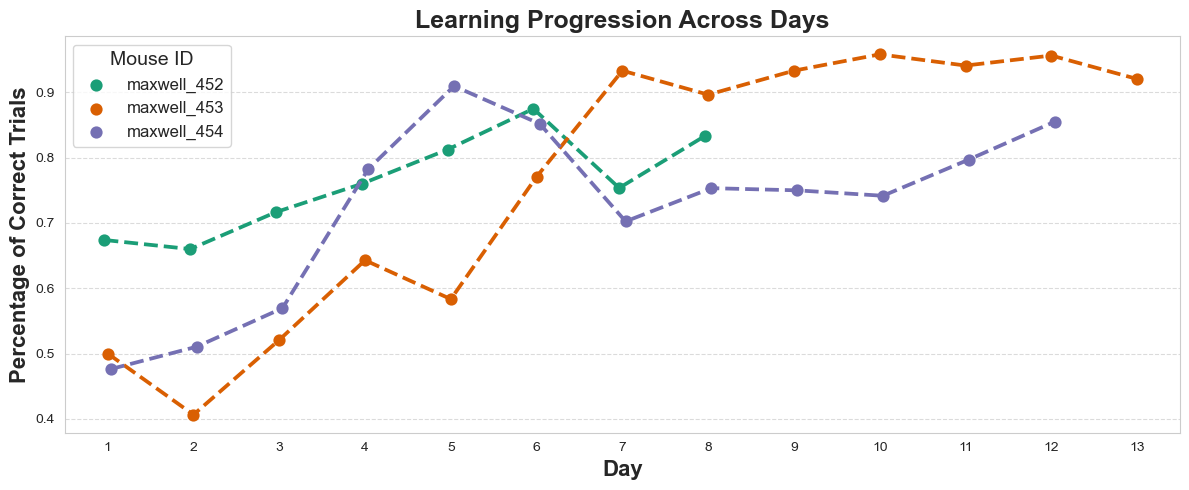

In [19]:
plot_learning_progression(df_all_mice)

In [7]:
def plot_lick_raster(task_data, day, delay=5000, offset=2):
    """
    Plots lick times on each trial (rows) separated by go trials (bottom) and no-go trials (top) for a specific day.

    Parameters:
    - task_data: DataFrame containing the task data for a specific mouse.
    - day: Integer, the day of session to plot.
    - delay: Integer, delay time in milliseconds.
    - offset: Integer, sets spacing between trial rasters.
    """

    temp_data = task_data[task_data.day == day]
    if not temp_data.empty:
        mouse_id = temp_data['mouse'].iloc[0]  # Assuming all entries have the same mouse ID
    else:
        mouse_id = "Unknown Mouse"  # Fallback in case the DataFrame is empty

    plot_height = len(temp_data) * offset

    lick_times_go = temp_data[temp_data.go_nogo == 'go']['lick_times']
    lick_times_nogo = temp_data[temp_data.go_nogo == 'no_go']['lick_times']
    lick_times_go_nogo = pd.concat([lick_times_go, lick_times_nogo])

    plt.figure(dpi=100, figsize=(10, 6))
    plt.eventplot(lick_times_go_nogo, linewidths=1, lineoffsets=2, colors='g')
    plt.xlim(0, delay + 10000)

    # Adding informative labels and title with dynamic mouse ID
    plt.xlabel('Time (s)')
    plt.ylabel('Trial Number')
    plt.title(f'Mouse {mouse_id} Lick Times for Day {day}')

    # Adding color-coded regions to the plot with labels outside the plot
    water_template = np.zeros(delay + 10000)
    water_template[delay + 6500:delay + 6650] = plot_height
    plt.fill_between(range(len(water_template)), water_template, color='skyblue', step='pre', label='Water Reward Window')

    go_nogo_template = np.zeros(delay + 10000)
    go_nogo_template[delay + 5500:delay + 6450] = plot_height
    plt.fill_between(range(len(go_nogo_template)), go_nogo_template, color='yellow', step='pre', label='Go/No-Go Decision Window')

    odour_template = np.zeros(delay + 10000)
    odour_template[3000:4000] = plot_height
    odour_template[delay + 4000:delay + 5000] = plot_height
    plt.fill_between(range(len(odour_template)), odour_template, color='0.8', step='pre', label='Odour Presentation')

    plt.yticks([0, len(lick_times_go) * offset, len(temp_data) * offset], ['0', f'Go Trials: {len(lick_times_go)}', f'Total Trials: {len(temp_data)}'])
    plt.xticks([2000, 4000, 6000, 8000, 10000, 12000, 14000], ['2', '4', '6', '8', '10', '12', '14'])
    plt.axhline(y=len(lick_times_go) * offset, c='k', linestyle='--', label='Go/No-Go Boundary')

    # Placing the legend outside
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()  # Adjust layout to make room for the legend
    plt.show()


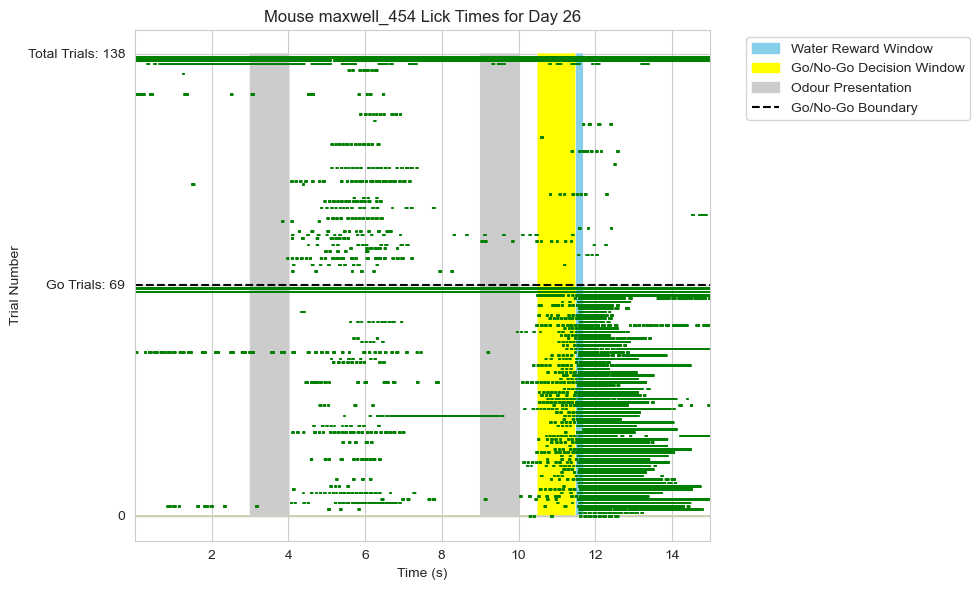

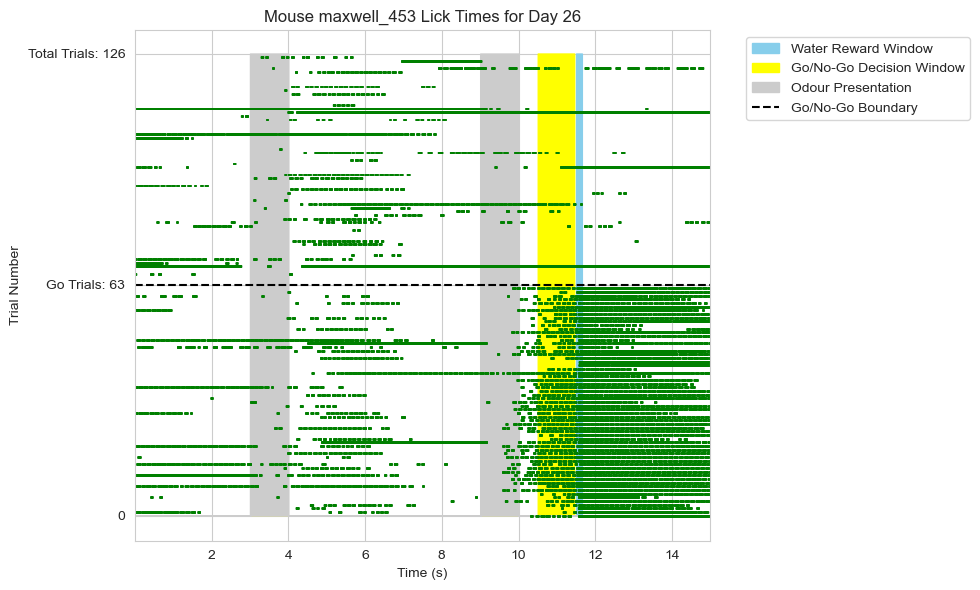

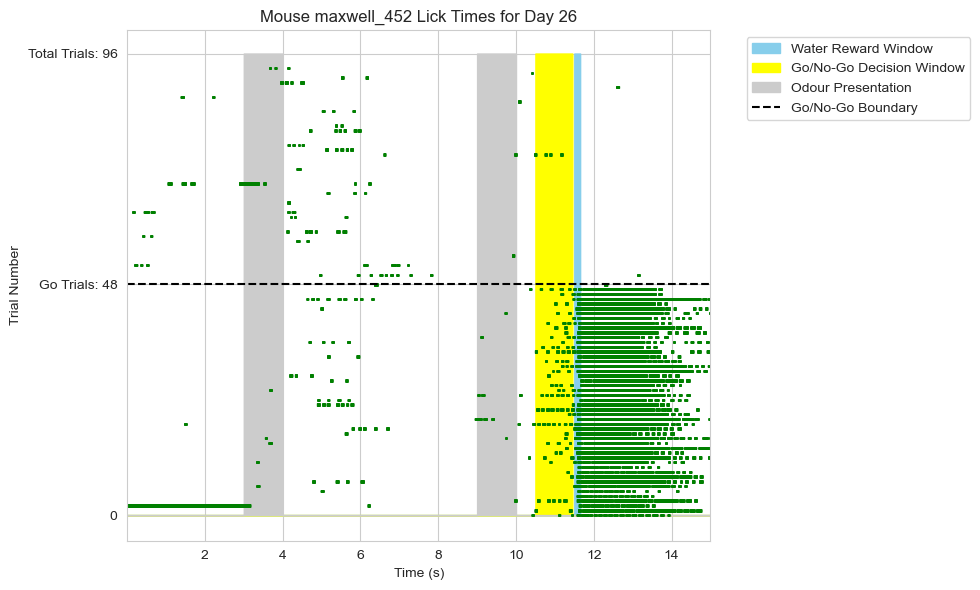

In [20]:
plot_lick_raster(df_maxwell_454, day=26)
plot_lick_raster(df_maxwell_453, day=26)
plot_lick_raster(df_maxwell_452, day=26)


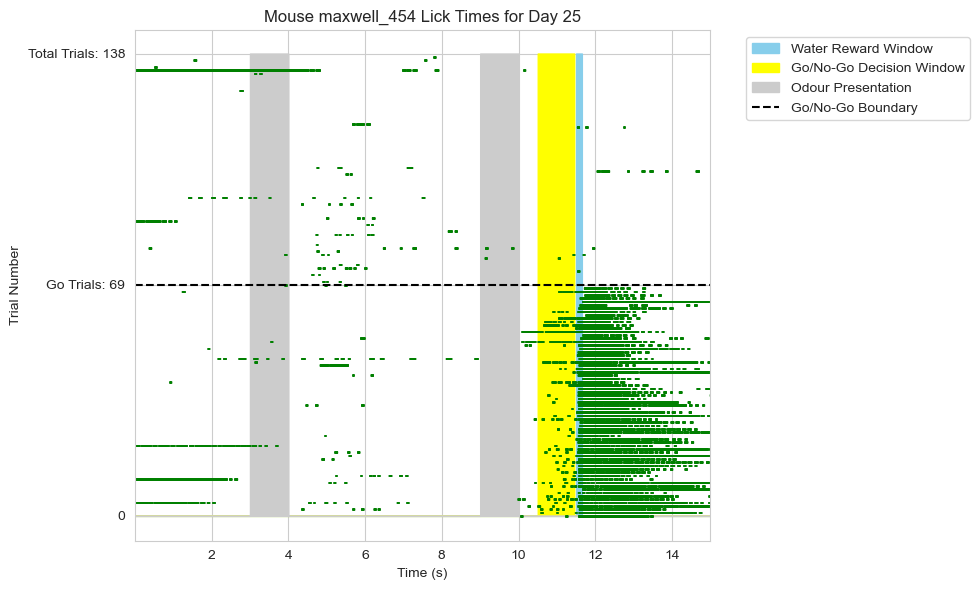

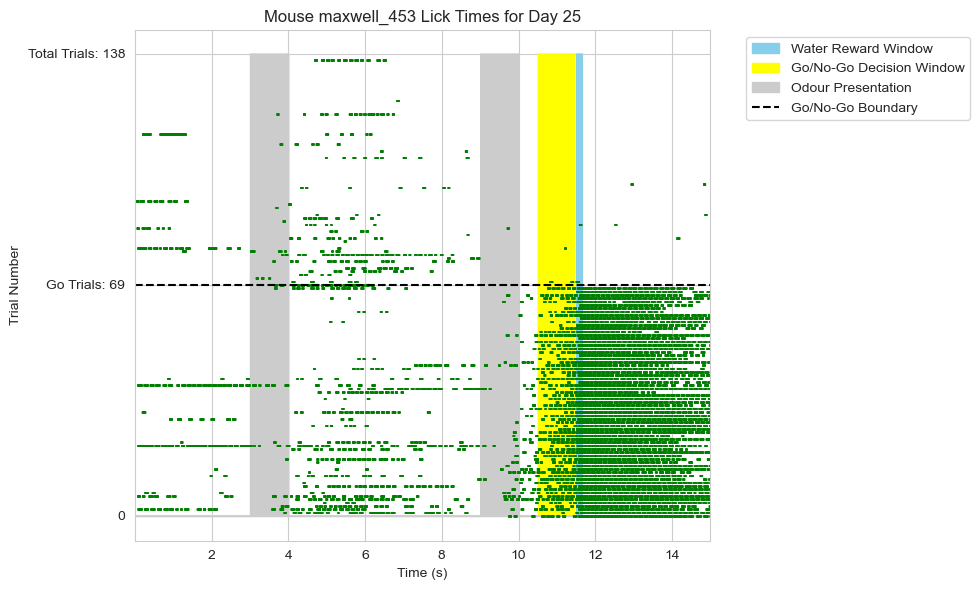

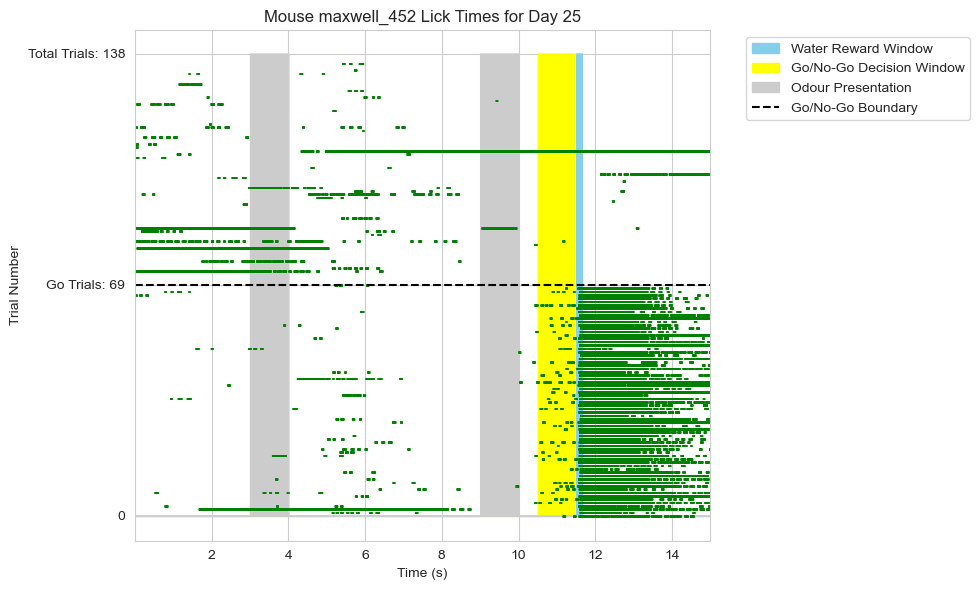

In [15]:
plot_lick_raster(df_maxwell_454, day=25)
plot_lick_raster(df_maxwell_453, day=25)
plot_lick_raster(df_maxwell_452, day=25)


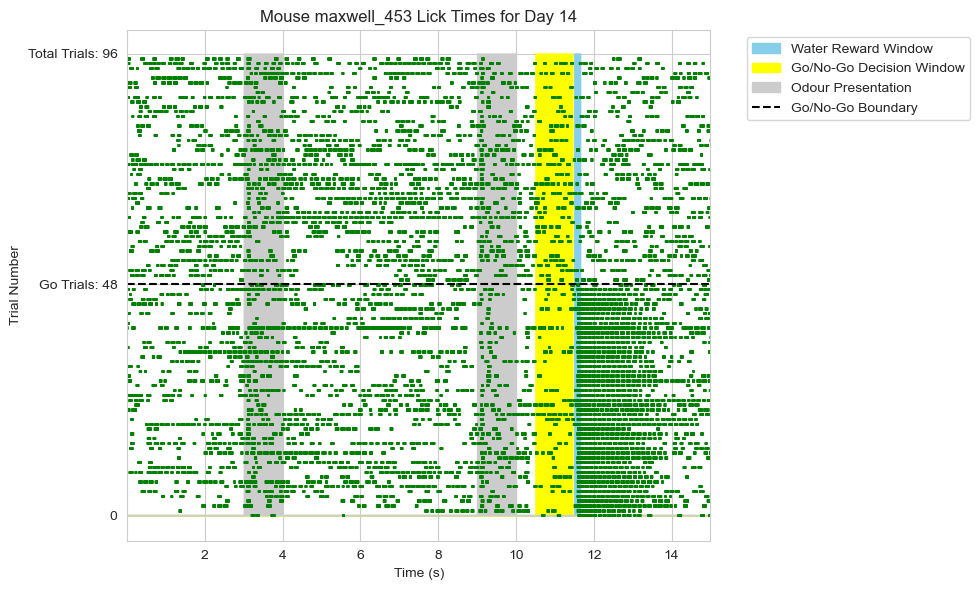

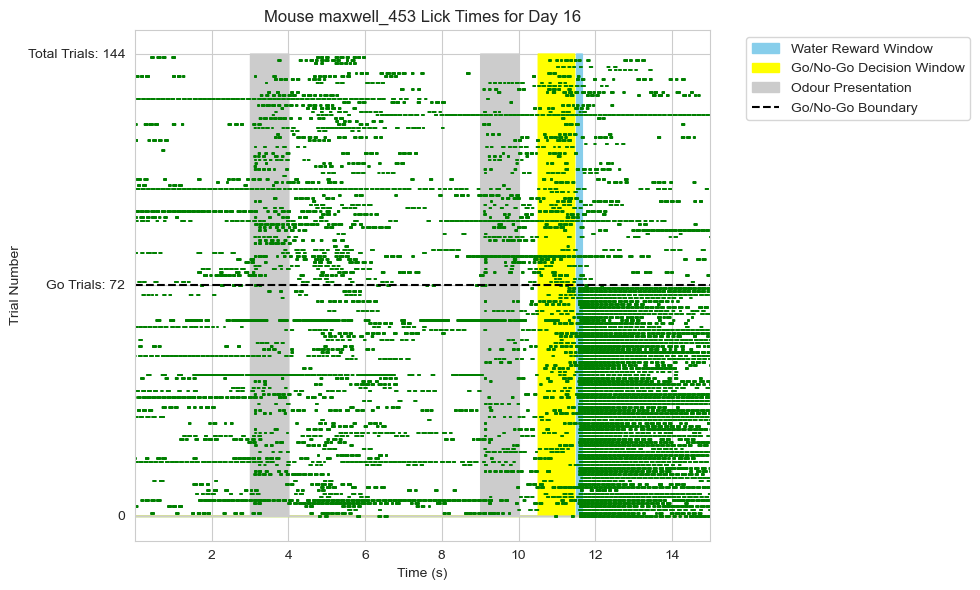

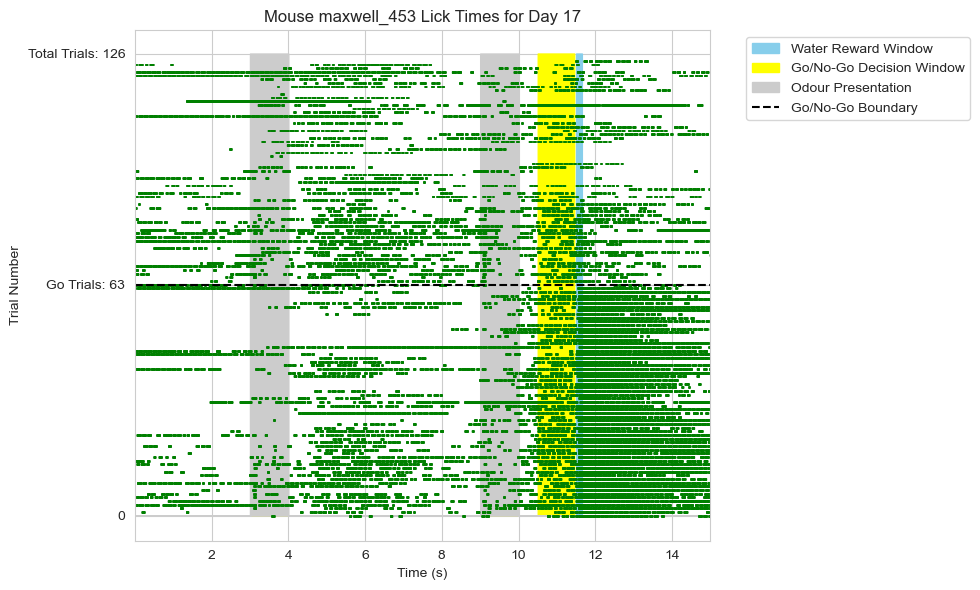

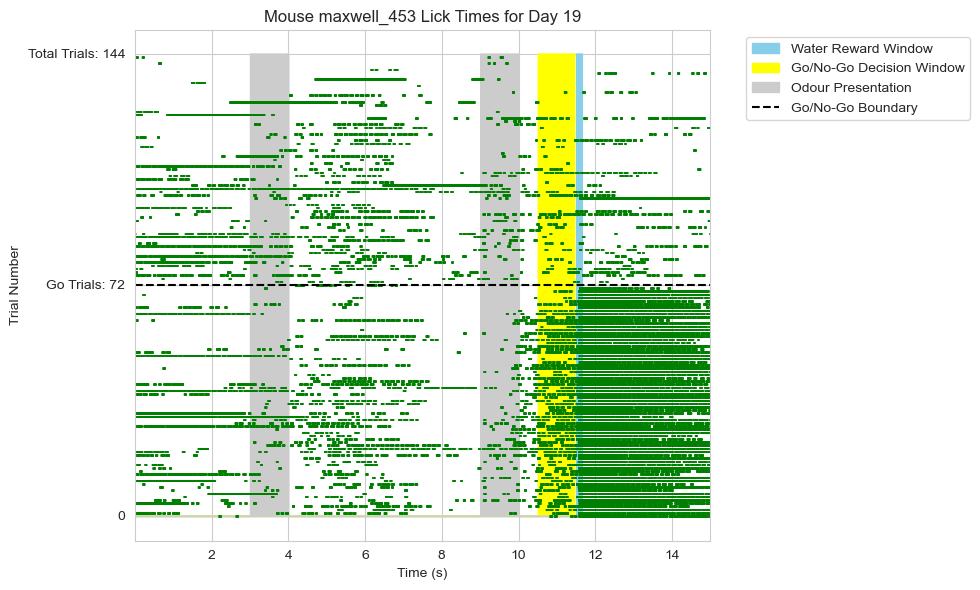

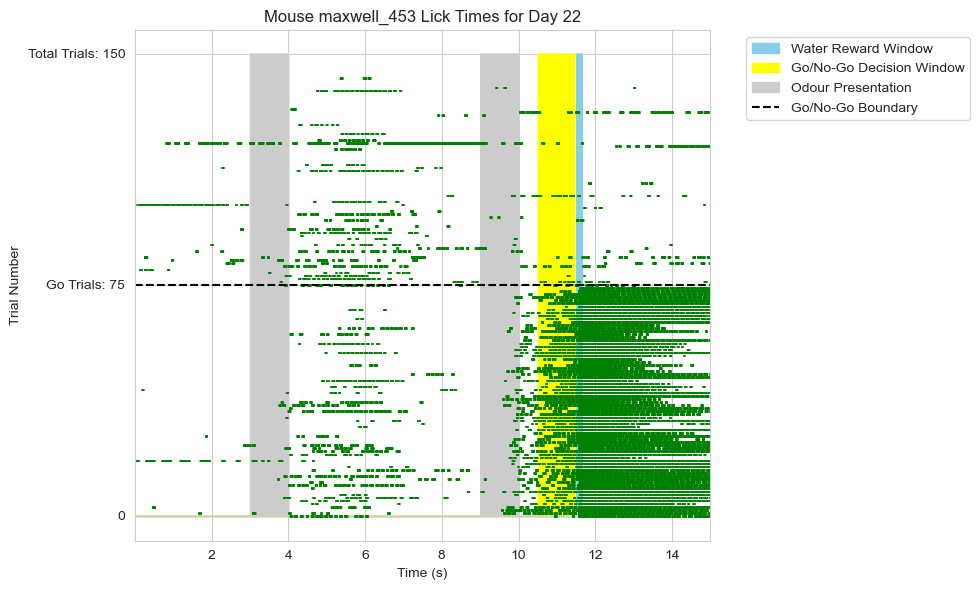

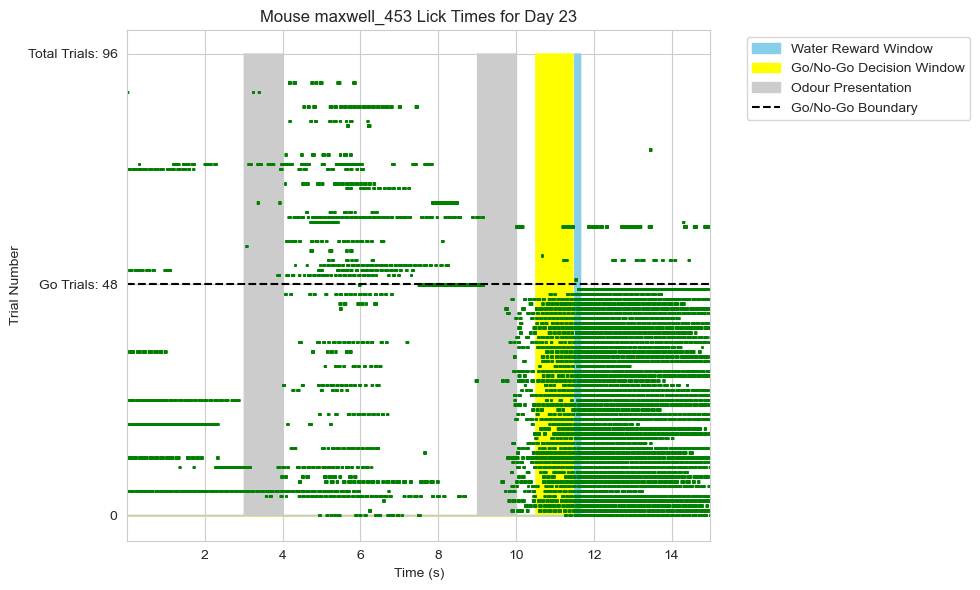

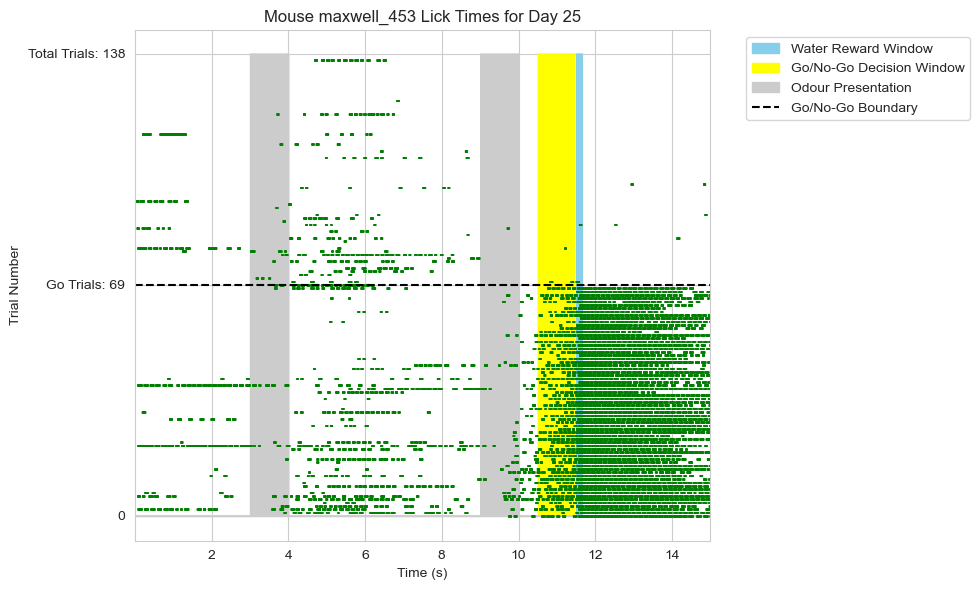

In [50]:
days_of_interest = [14,16,17,19,23]
plot_lick_raster(df_maxwell_453, day=14)
plot_lick_raster(df_maxwell_453, day=16)
plot_lick_raster(df_maxwell_453, day=17)
plot_lick_raster(df_maxwell_453, day=19)
plot_lick_raster(df_maxwell_453, day=22)
plot_lick_raster(df_maxwell_453, day=23)
plot_lick_raster(df_maxwell_453, day=25)



In [10]:
import scipy

import numpy as np
import scipy.ndimage
import seaborn as sns
import matplotlib.pyplot as plt

def plot_mouse_licking_dynamic(df_all_mice, days, mouse, block_lim=60, sigma=100, delay=5000, plot_height=6, shaping=True):
    """
    Plots the behavior of a mouse over given days with specified parameters, including an option
    to only plot rewarded trial types if shaping is True. Differentiates rewarded and non-rewarded
    trial types by color. Adjusts plot size for a nicer appearance.

    Parameters:
    - df_all_mice: DataFrame containing all the mice data.
    - days: List of days to plot.
    - mouse: The name of the mouse to plot.
    - block_lim: The upper limit of blocks to consider.
    - sigma: Sigma value for Gaussian filter.
    - delay: Delay before events occur in the plot.
    - plot_height: Height of the template plots.
    - shaping: If True, only plots the rewarded trial types.
    """
    sns.set_palette("Dark2")
    figsize_width = max(8, len(days) * 3)  # Slightly wider for better aspect ratio
    figsize_height = max(4, len(days) * 3)  # Proportional height but not too tall
    plt.figure(figsize=(figsize_width, figsize_height))

    rewarded_color = 'green'
    non_rewarded_color = 'red'

    for i, day in enumerate(days):
        temp_data = df_all_mice[(df_all_mice.day == day) & (df_all_mice.block < block_lim) & (df_all_mice.mouse == mouse)]
        plt.subplot(len(days), 1, 1+i)

    # Individual heights for each template
    water_height = 3.5  # Height for the water template
    odour_height = 3.5  # Height for the odour template
    go_nogo_height = 3.5  # Height for the Go/No-Go template
    
    for i, day in enumerate(days):
        temp_data = df_all_mice[(df_all_mice.day == day) & (df_all_mice.block < block_lim) & (df_all_mice.mouse == mouse)]
        plt.subplot(len(days), 1, 1+i)
    
        # Plotting templates with customized heights
        water_template = np.zeros(delay+10000)
        water_template[delay+6500:delay+6650] = water_height
        plt.fill_between(range(len(water_template)), water_template, color='lightblue', label='Water')
    
        odour_template = np.zeros(delay+10000)
        odour_template[3000:4000] = odour_height
        odour_template[delay+4000:delay+5000] = odour_height
        plt.fill_between(range(len(odour_template)), odour_template, color='0.8', label='Odour')
    
        go_nogo_template = np.zeros(delay+10000)
        go_nogo_template[delay+5500:delay+6450] = go_nogo_height
        plt.fill_between(range(len(go_nogo_template)), go_nogo_template, color='yellow', label='Go/No-Go')

        trial_types = ['c->a', 'a->b', 'b->c'] if shaping else ['c->a', 'a->b', 'b->c', 'b->a', 'c->b', 'a->c']

        for trial_type in trial_types:
            lick_data_lists = temp_data[temp_data.trial_type == trial_type]['lick_data'].tolist()

            # Ensure lick_data_lists is not empty to avoid ValueError in np.max() and np.pad()
            if not lick_data_lists:
                continue

            max_len = max(len(lst) for lst in lick_data_lists)
            padded_data = np.array([np.pad(lst, (0, max_len - len(lst)), 'constant', constant_values=np.nan) for lst in lick_data_lists])
            mean_data = np.nanmean(padded_data, axis=0)
            filtered_data = scipy.ndimage.gaussian_filter1d(mean_data, sigma)

            color = rewarded_color if trial_type in ['c->a', 'a->b', 'b->c'] else non_rewarded_color
            sns.lineplot(x=range(len(filtered_data)), y=filtered_data, label=trial_type, color=color)

        # plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Trial Types & Events')
        plt.xlim(0, 20000)
        plt.xlabel('Time')
        plt.ylabel('Lick Rate')
        plt.title(f'Mouse: {mouse} - Day: {day}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()



def plot_licking_dynamics_for_mouse(days_of_interest, mouse_id, df_all_mice, block_lim=60, sigma=100, delay=5000, plot_height=6, shaping=False):
    """
    Plot licking dynamics for a specific mouse across specified days.

    Args:
    - days_of_interest (dict): Dictionary mapping mouse IDs to lists of days of interest.
    - mouse_id (str): The ID of the mouse to plot.
    - df_all_mice (DataFrame): DataFrame containing all mice data.
    - block_lim (int): The limit for the block.
    - sigma (int): Sigma value for smoothing.
    - delay (int): Delay in milliseconds.
    - plot_height (int): The height of each plot.
    - shaping (bool): Whether shaping is applied.
    """
    # Check if the mouse_id is in the days_of_interest
    if mouse_id in days_of_interest:
        # Loop through each day for the specified mouse
        for day in days_of_interest[mouse_id]:
            # Call the plotting function for each day
            plot_mouse_licking_dynamic(df_all_mice, days=[day], mouse=mouse_id, block_lim=block_lim, sigma=sigma, delay=delay, plot_height=plot_height, shaping=shaping)
    else:
        print(f"No days of interest found for mouse {mouse_id}.")


In [60]:
# Example usage
mouse_id = 'maxwell_453'  # Specify the mouse ID
days_of_interest =  [14,16,17,19,22,23,25]
plot_mouse_licking_dynamic(df_all_mice, days_of_interest, mouse = mouse_id, block_lim=60, sigma=100, delay=5000, plot_height=3, shaping=False)

KeyboardInterrupt: 

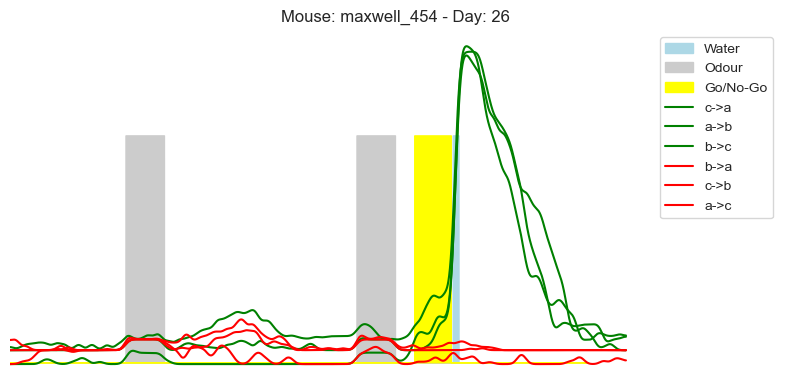

In [24]:
mouse_id = 'maxwell_454'  # Specify the mouse ID
days_of_interest =  [26]
plot_mouse_licking_dynamic(df_all_mice, days_of_interest, mouse = mouse_id, block_lim=60, sigma=100, delay=5000, plot_height=3, shaping=False)

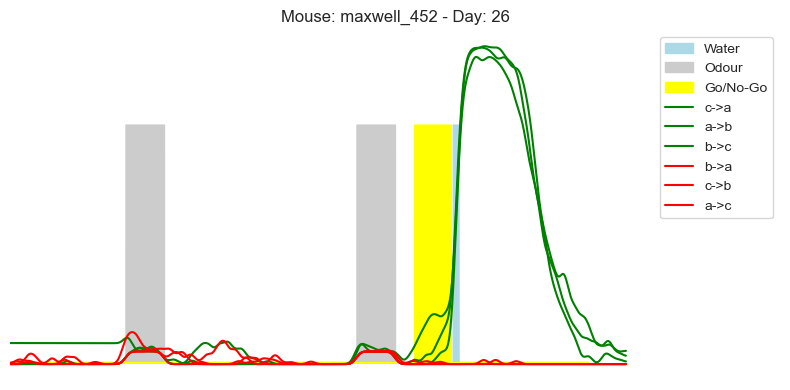

In [13]:
mouse_id = 'maxwell_452'  # Specify the mouse ID
days_of_interest =  [26]
plot_mouse_licking_dynamic(df_all_mice, days_of_interest, mouse = mouse_id, block_lim=60, sigma=100, delay=5000, plot_height=3, shaping=False)

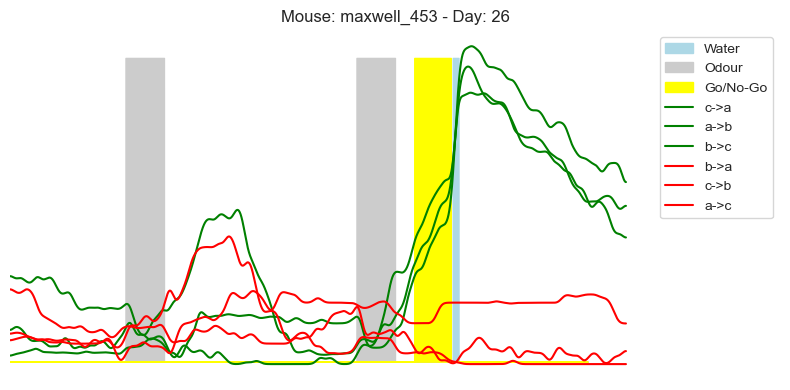

In [11]:
mouse_id = 'maxwell_453'  # Specify the mouse ID
days_of_interest =  [26]
plot_mouse_licking_dynamic(df_all_mice, days_of_interest, mouse = mouse_id, block_lim=60, sigma=100, delay=5000, plot_height=3, shaping=False)

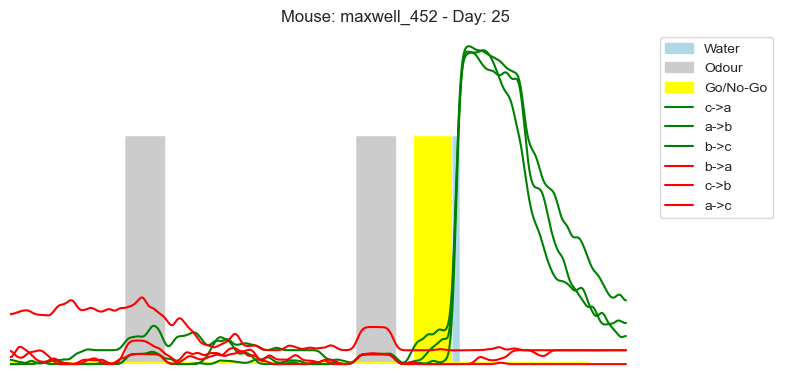

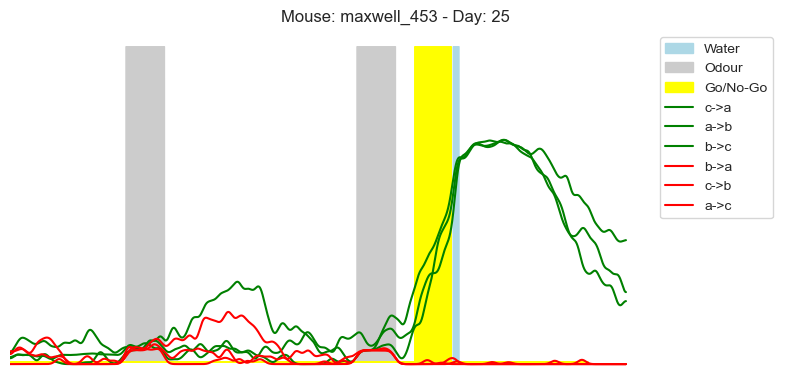

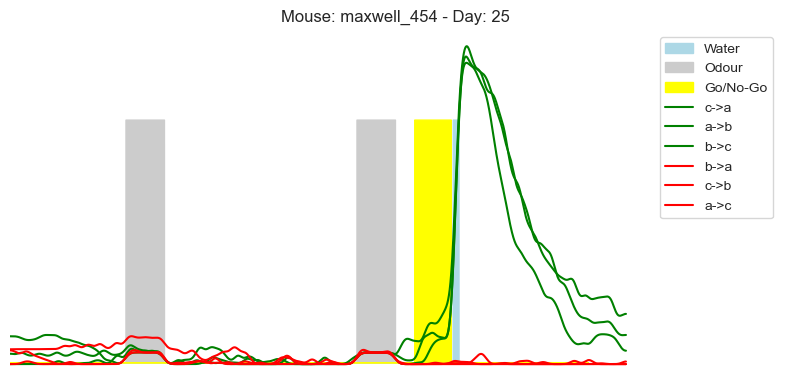

In [66]:
mouse_id = 'maxwell_452'  # Specify the mouse ID
days_of_interest =  [25]
plot_mouse_licking_dynamic(df_all_mice, days_of_interest, mouse = mouse_id, block_lim=60, sigma=100, delay=5000, plot_height=3, shaping=False)

mouse_id = 'maxwell_453'  # Specify the mouse ID
days_of_interest =  [25]
plot_mouse_licking_dynamic(df_all_mice, days_of_interest, mouse = mouse_id, block_lim=60, sigma=100, delay=5000, plot_height=3, shaping=False)

mouse_id = 'maxwell_454'  # Specify the mouse ID
days_of_interest =  [25]
plot_mouse_licking_dynamic(df_all_mice, days_of_interest, mouse = mouse_id, block_lim=60, sigma=100, delay=5000, plot_height=3, shaping=False)


# Combining Svenja's data

In [4]:
svenja_data = pd.read_csv('/Users/chenx/Desktop/MacAskill Lab/Data/data_from_svenja/AM_April22_learning.csv',index_col=0)
#removing sn_70, a silly mouse outlier
svenja_data = svenja_data[svenja_data['mouse'] != 'sn_70']


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Define a new function incorporating LOWESS smoothing and adjusted plot aesthetics
def process_and_plot_learning(df1, df2):
    """
    Combines two dataframes, processes the combined dataframe to calculate the mean percentage of correct trials
    per mouse per day, applies LOWESS smoothing to the pooled data, and plots the learning progression with the
    smoothed trend line. The plot is made larger and the legend is placed outside the plot area.
    
    Parameters:
    - df1: First DataFrame containing at least 'mouse', 'day', and 'correct' columns.
    - df2: Second DataFrame to be combined with the first, also containing 'mouse', 'day', and 'correct'.
    """

    # Combine the dataframes
    combined_df = pd.concat([df1[['mouse', 'day', 'correct']], df2[['mouse', 'day', 'correct']]], ignore_index=True)

    # Convert 'day' to numeric
    combined_df['day'] = pd.to_numeric(combined_df['day'])

    # Rank the 'day' column for each mouse separately to get sequential day numbers starting from 1
    combined_df['sequential_day'] = combined_df.groupby('mouse')['day'].rank(method='dense').astype(int)

    # Group by 'mouse' and 'sequential_day' and calculate mean 'correct'
    grouped_data = combined_df.groupby(['mouse', 'sequential_day'])['correct'].mean().reset_index()

    # Rename 'correct' column for clarity
    grouped_data.rename(columns={'correct': 'percentage_correct'}, inplace=True)

    # Apply LOWESS smoothing to the pooled data
    pooled_data = grouped_data.groupby('sequential_day')['percentage_correct'].mean().reset_index()
    pooled_lowess = sm.nonparametric.lowess(pooled_data['percentage_correct'], pooled_data['sequential_day'], frac=0.2)

    # Plotting with seaborn
    plt.figure(figsize=(12, 6))  # Make plot larger
    sns.pointplot(data=grouped_data, x='sequential_day', y='percentage_correct', hue='mouse', dodge=True, markers='o', linestyles='--')

    # Plot the smoothed trend line
    plt.plot(pooled_lowess[:, 0], pooled_lowess[:, 1], color='red', lw=4, label='Pooled Trend')

    # Adjusting plot aesthetics
    plt.title('Learning Progression Across Days', fontsize=18, fontweight='bold')
    plt.ylabel('Percentage of Correct Trials', fontsize=16, fontweight='bold')
    plt.xlabel('Day', fontsize=16, fontweight='bold')

    # Place legend outside the plot area
    plt.legend(title='Mouse ID', title_fontsize='14', fontsize='12', loc='upper left', bbox_to_anchor=(1, 1))

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

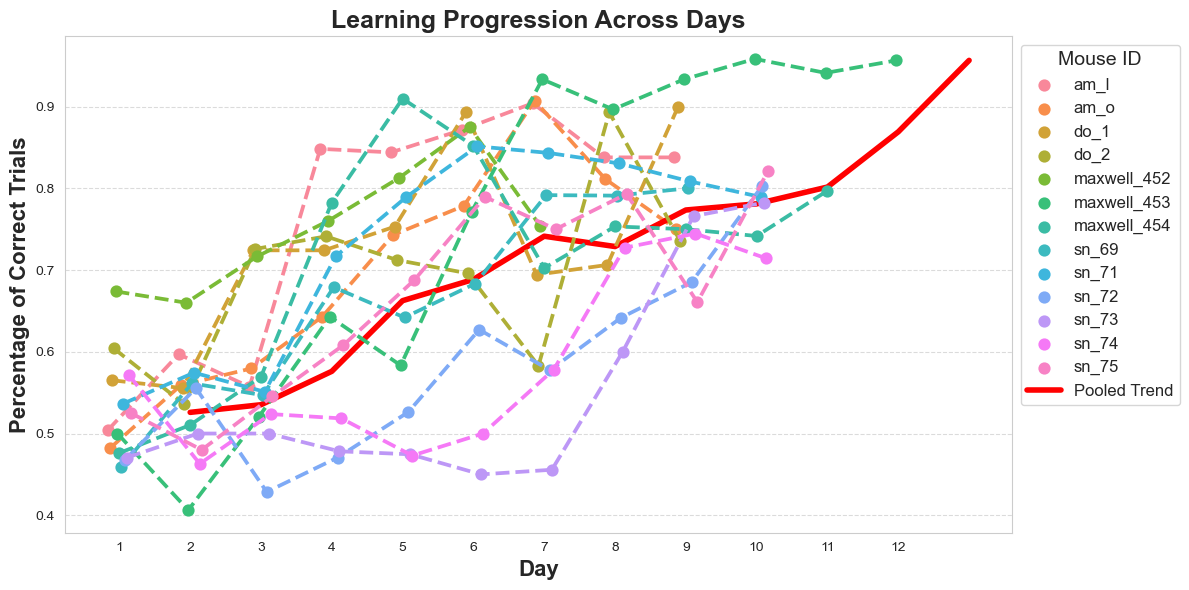

In [11]:
process_and_plot_learning(df_all_mice, svenja_data)
